# **Khanif Fauzi Pambudi (Milestone 1 Phase 1)**
# **Supervised Learning (Classification)**

# **Import Library**

In [1518]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

# **Data Loading**

In [1519]:
df = pd.read_csv('bank-additional.csv', sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [1520]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [1521]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


# **Data Exploration**

In [1522]:
len(df)

4119

In [1523]:
df.shape

(4119, 21)

In [1524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [1525]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [1526]:
nmbr_cols = list(df.select_dtypes("number").columns)
nmbr_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [1527]:
df[nmbr_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [1528]:
ctg_cols = list(df.select_dtypes(object).drop(columns = ["y"]).columns)
ctg_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [1529]:
df[ctg_cols].describe().T

,count,unique,top,freq
job,4119,12,admin.,1012
marital,4119,4,married,2509
education,4119,8,university.degree,1264
default,4119,3,no,3315
housing,4119,3,yes,2175
loan,4119,3,no,3349
contact,4119,2,cellular,2652
month,4119,10,may,1378
day_of_week,4119,5,thu,860
poutcome,4119,3,nonexistent,3523


In [1530]:
df[["y"]].describe().T

,count,unique,top,freq
y,4119,2,no,3668


In [1531]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# **Data Preprocessing**

# **Target Data**

In [1532]:
df.groupby(["y"]).count()[["duration"]].rename({"duration" : "Count"}, axis = 1)

,Count
y,
no,3668
yes,451


In [1533]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [1534]:
encode = LabelEncoder()
df['y'] = encode.fit_transform(df['y'])

In [1535]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [1536]:
encode = LabelEncoder()
df['job'] = encode.fit_transform(df['job'])
df['marital'] = encode.fit_transform(df['marital'])
df['education'] = encode.fit_transform(df['education'])
df['default'] = encode.fit_transform(df['default'])
df['housing'] = encode.fit_transform(df['housing'])
df['loan'] = encode.fit_transform(df['loan'])
df['contact'] = encode.fit_transform(df['contact'])
df['month'] = encode.fit_transform(df['month'])
df['day_of_week'] = encode.fit_transform(df['day_of_week'])
df['poutcome'] = encode.fit_transform(df['poutcome'])

In [1537]:
df['job'].value_counts()

0     1012
1      884
9      691
7      393
4      324
5      166
6      159
2      148
10     111
3      110
8       82
11      39
Name: job, dtype: int64

# **EDA**

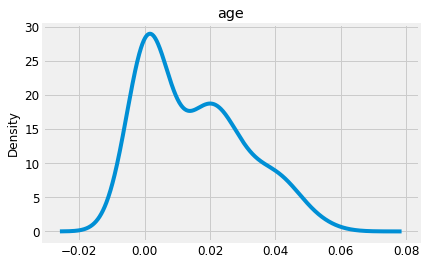

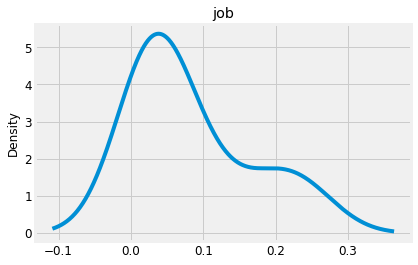

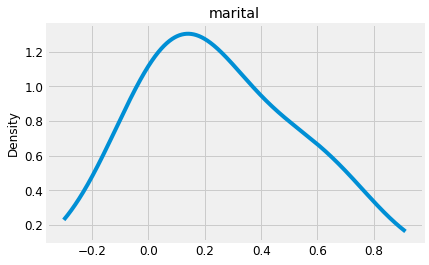

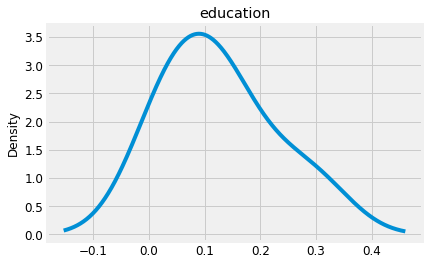

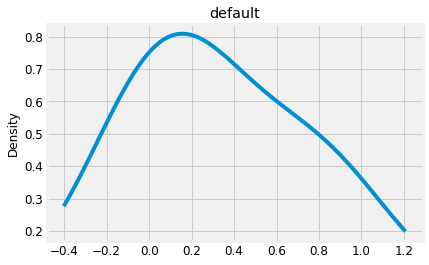

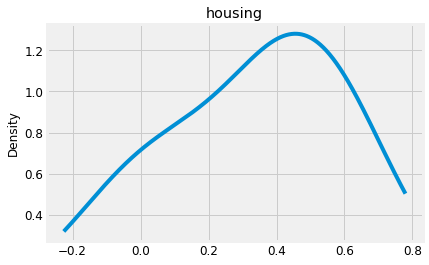

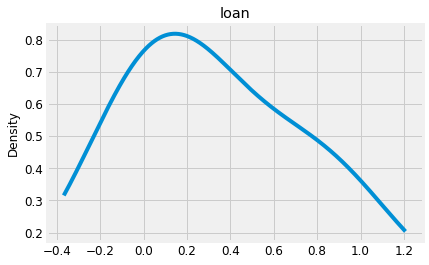

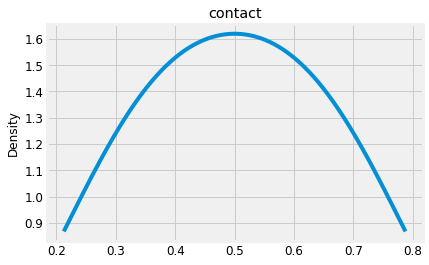

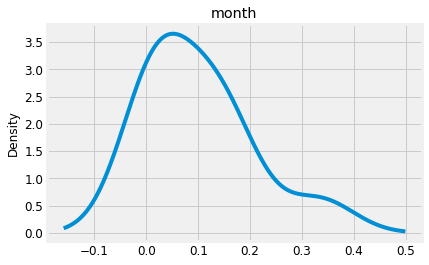

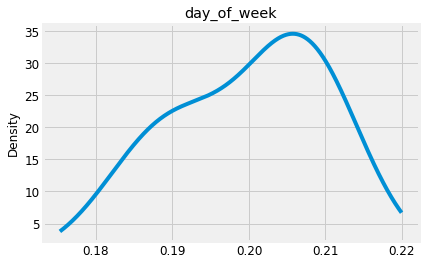

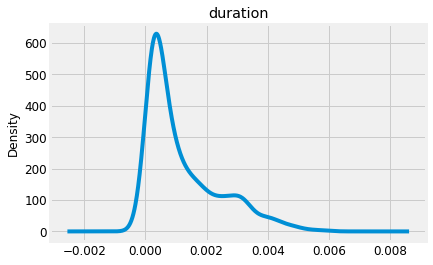

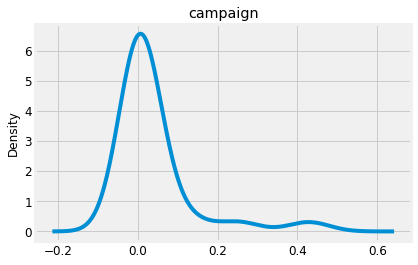

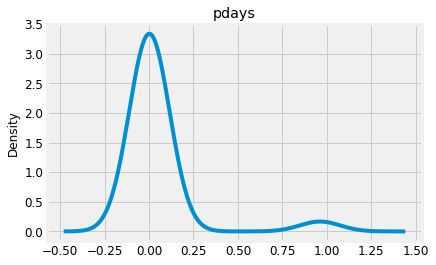

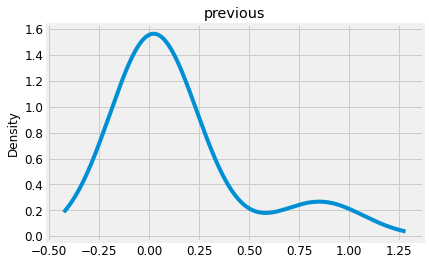

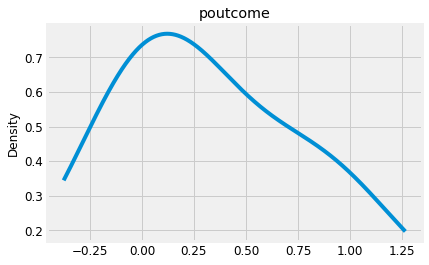

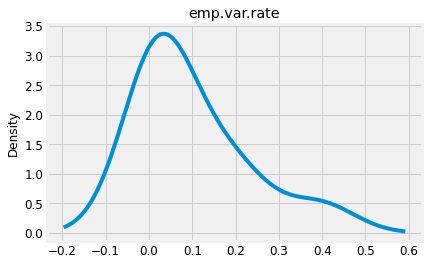

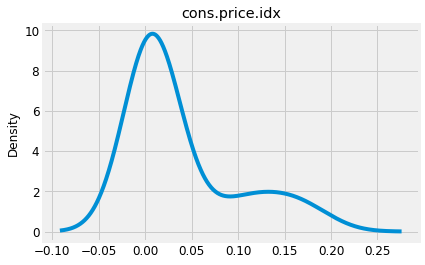

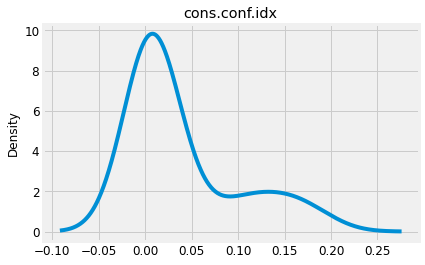

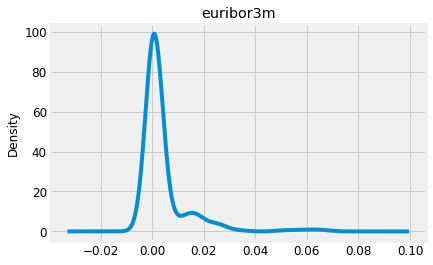

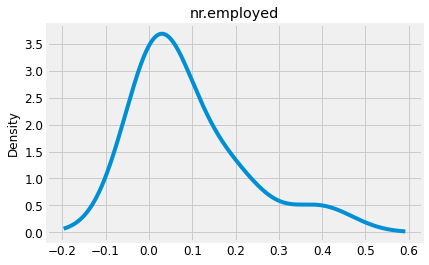

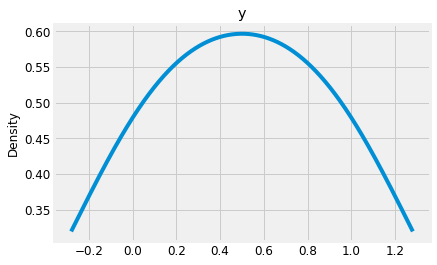

In [1538]:
for c in df.select_dtypes(include='number'):
  df[c].value_counts(normalize=True).plot.kde(title=c)
  plt.show()

In [1539]:
new_df = df.drop(columns=["month","day_of_week","duration","emp.var.rate","cons.price.idx",
                                                      "cons.price.idx","cons.conf.idx","nr.employed"])

In [1540]:
new_df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,euribor3m,y
0,30,1,1,2,0,2,0,0,2,999,0,1,1.313,0
1,39,7,2,3,0,0,0,1,4,999,0,1,4.855,0
2,25,7,1,3,0,2,0,1,1,999,0,1,4.962,0
3,38,7,1,2,0,1,1,1,3,999,0,1,4.959,0
4,47,0,1,6,0,2,0,0,1,999,0,1,4.191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,1,999,0,1,4.958,0
4115,39,0,1,3,0,2,0,1,1,999,0,1,4.959,0
4116,27,8,2,3,0,0,0,0,2,999,1,0,1.354,0
4117,58,0,1,3,0,0,0,0,1,999,0,1,4.966,0


# **Split Data**

In [1541]:
X = new_df.drop(columns = ["y"])
y = new_df["y"]

In [1542]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.2, random_state = 54)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/5, random_state = 54)

# **Pemilihan Feature**

In [1543]:
X_train.select_dtypes(include='number').columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'pdays', 'previous', 'poutcome', 'euribor3m'],
      dtype='object')

In [1544]:
y_train.shape, X_train.shape

((3295,), (3295, 13))

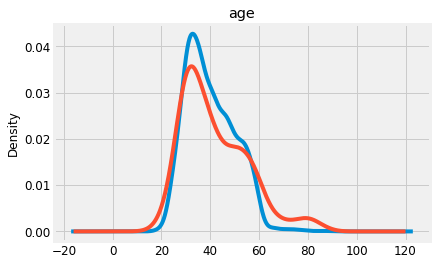

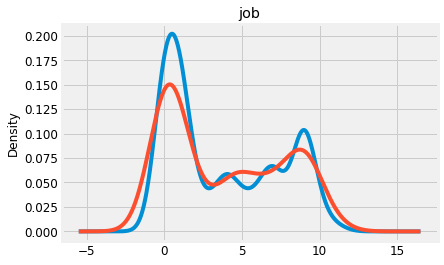

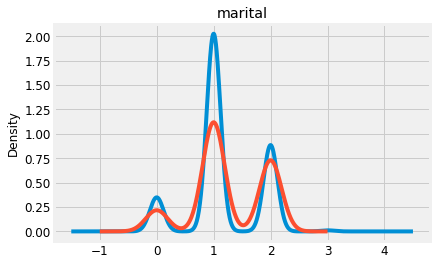

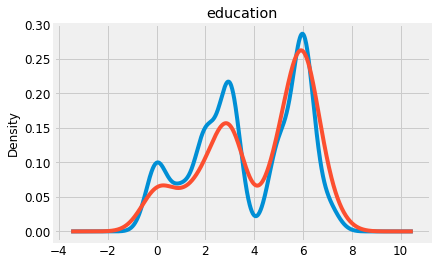

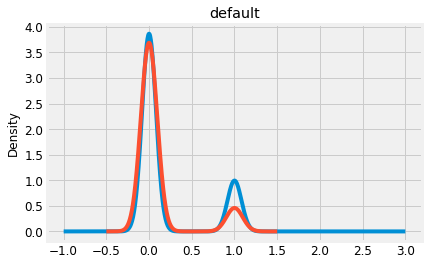

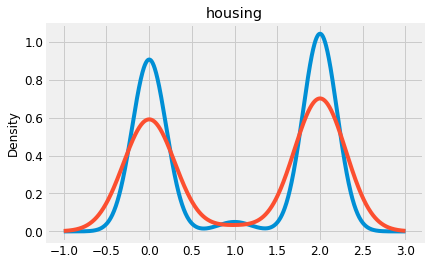

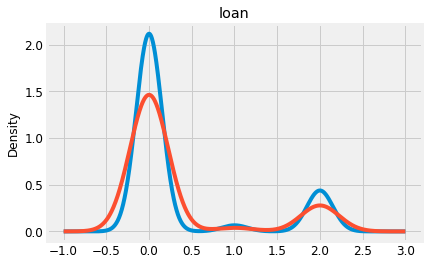

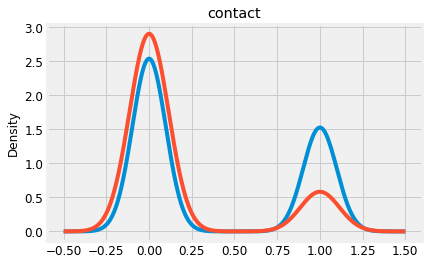

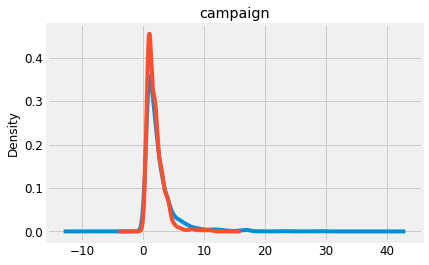

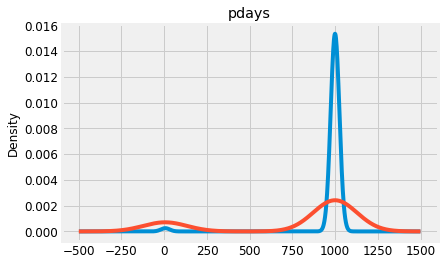

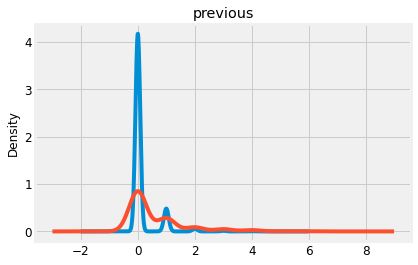

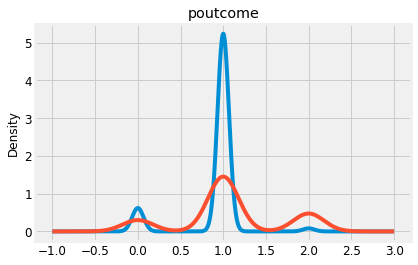

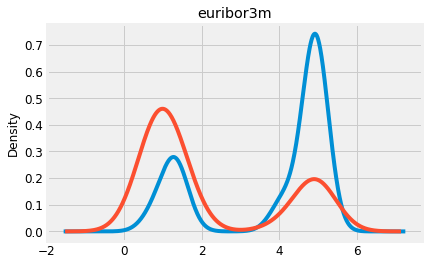

In [1545]:
for c in X_train.select_dtypes(include='number'):
  tmp = pd.concat([X_train[c], y_train], axis=1)
  tmp.groupby('y')[c].plot.kde(title=c)
  plt.show()

# **LOGISTIC REGRESSION**

# **Scalling**

In [1546]:
scaler = StandardScaler()
scaler.fit(Xtrain.select_dtypes(exclude='object'))

StandardScaler(copy=True, with_mean=True, with_std=True)

# **Model Train**

In [1547]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.2, random_state = 54)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/5, random_state = 54)

In [1548]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs", random_state=54)

In [1549]:
print(y_train.unique())

[1 0]


In [1550]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=54, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1551]:
np.abs(model.coef_)

array([[0.01168548, 0.00625892, 0.16135718, 0.07263133, 0.05213196,
        0.09030331, 0.03738634, 0.11624423, 0.05506282, 0.00171182,
        0.00126318, 0.18630545, 0.4459449 ]])

In [1552]:
y_train_predict = model.predict(X_train)

In [1553]:
np.sum(y_train==y_train_predict)

2962

In [1554]:
np.sum(y_train==y_train_predict)/len(y_train)

0.898937784522003

In [1555]:
np.sum(y_val== model.predict(X_val))/len(y_val)

0.9013657056145675

In [1556]:
y_val_pred = model.predict(X_val)
X_val[y_val_pred==0]

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,euribor3m
810,40,0,2,3,1,2,0,1,3,999,0,1,4.865
431,58,1,1,0,1,2,2,0,1,999,0,1,1.281
2500,46,0,1,3,0,0,0,0,2,999,1,0,1.313
242,31,7,1,3,1,0,0,0,3,999,0,1,4.960
675,42,1,2,0,0,1,1,1,1,999,0,1,4.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,44,1,1,2,0,0,0,0,3,999,0,1,4.970
3420,33,6,2,3,0,2,2,0,1,999,0,1,1.291
261,32,9,1,5,0,2,0,0,1,999,0,1,4.963
2908,52,6,1,0,1,0,2,1,2,999,0,1,4.961


In [1557]:
y_val_pred = model.predict(X_val)
X_val[y_val_pred==0]

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,euribor3m
810,40,0,2,3,1,2,0,1,3,999,0,1,4.865
431,58,1,1,0,1,2,2,0,1,999,0,1,1.281
2500,46,0,1,3,0,0,0,0,2,999,1,0,1.313
242,31,7,1,3,1,0,0,0,3,999,0,1,4.960
675,42,1,2,0,0,1,1,1,1,999,0,1,4.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,44,1,1,2,0,0,0,0,3,999,0,1,4.970
3420,33,6,2,3,0,2,2,0,1,999,0,1,1.291
261,32,9,1,5,0,2,0,0,1,999,0,1,4.963
2908,52,6,1,0,1,0,2,1,2,999,0,1,4.961


# **Model Score**

In [1558]:
model.score(X_val, y_val)

0.9013657056145675

# **F1 Score**

In [1559]:
from sklearn.metrics import f1_score

y_train_pred = model.predict(X_train)
print(f1_score(y_train, y_train_pred))

y_val_pred = model.predict(X_val)
print(f1_score(y_val, y_val_pred))

0.33266533066132264
0.2168674698795181


# **PR Curve**

In [1560]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, X_train, y_train, cv=3,method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [1561]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

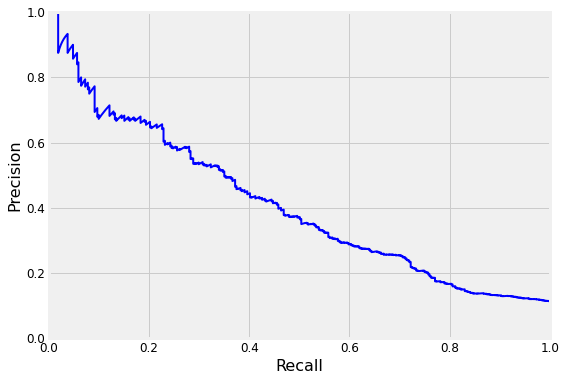

In [1562]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# **ROC Curve**

In [1563]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

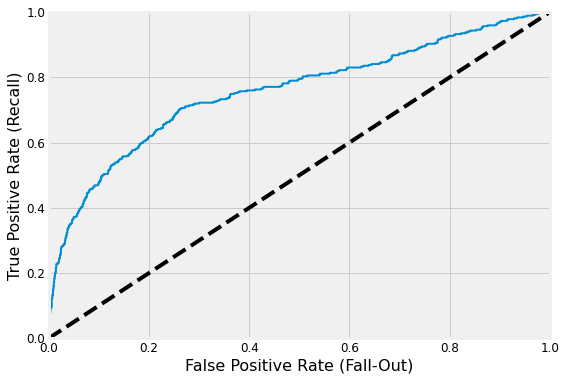

In [1564]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

# **SUPPORT VECTOR MACHINE**

# **IMPORT LIBRARY**

In [1565]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [1566]:
import importlib, inspect

In [1567]:
for name, cls in inspect.getmembers(svm, inspect.isclass):
    print(name)

LinearSVC
LinearSVR
NuSVC
NuSVR
OneClassSVM
SVC
SVR


In [1568]:
from sklearn.svm import SVC
SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
probability=False, tol=0.001, cache_size=200, class_weight=None, 
verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1569]:
import sklearn
sklearn.__version__

'0.22.2.post1'

# **Split Data**

In [1570]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54, stratify=y)

In [1571]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=54, stratify=y_train)

In [1572]:
X_train.shape

(2883, 13)

In [1573]:
X_val.shape

(824, 13)

In [1574]:
X_test.shape

(412, 13)

# **Model Train**

In [1575]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

In [1576]:
X_train

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,euribor3m
839,29,2,1,0,0,0,0,0,4,999,0,1,4.961
3748,29,4,2,6,0,0,0,1,1,999,0,1,4.855
3906,27,9,2,5,0,0,0,0,1,999,0,1,4.958
2233,38,9,1,5,0,2,2,0,3,999,0,1,4.120
1614,55,1,0,0,1,2,0,0,1,999,1,0,1.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,55,10,2,0,1,1,1,1,7,999,0,1,4.855
2135,47,0,1,6,0,2,0,0,3,999,0,1,4.965
2707,56,3,0,0,0,2,0,0,1,999,1,0,4.076
39,20,8,2,7,0,0,0,0,3,999,3,0,0.977


In [1577]:
X_train_trf

array([[-1.07558807, -0.48976159, -0.29028349, ..., -0.35338816,
         0.21480997,  0.78146756],
       [-1.07558807,  0.0671237 ,  1.344262  , ..., -0.35338816,
         0.21480997,  0.72059153],
       [-1.26788129,  1.45933695,  1.344262  , ..., -0.35338816,
         0.21480997,  0.77974466],
       ...,
       [ 1.52037035, -0.21131894, -1.92482897, ...,  1.49229675,
        -2.47778636,  0.27321009],
       [-1.94090755,  1.1808943 ,  1.344262  , ...,  5.18366656,
        -2.47778636, -1.50655251],
       [ 0.55890427, -0.48976159, -0.29028349, ..., -0.35338816,
         0.21480997, -1.57317157]])

# **Create Model and Train**

In [1578]:
from sklearn.svm import SVC
model_svc_linear = SVC(kernel='linear', random_state=69,C=1)
%time model_svc_linear.fit(X_train_trf, y_train)

CPU times: user 2.67 s, sys: 4.48 ms, total: 2.68 s
Wall time: 2.68 s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=69, shrinking=True, tol=0.001,
    verbose=False)

In [1579]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=69,C=1)
%time model_svc.fit(X_train_trf, y_train)

CPU times: user 222 ms, sys: 394 µs, total: 223 ms
Wall time: 223 ms


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=69, shrinking=True, tol=0.001,
    verbose=False)

In [1580]:
from sklearn.svm import SVC
model_svc_poly = SVC(kernel='poly',degree=4, random_state=69,C=1)
%time model_svc_poly.fit(X_train_trf, y_train)

CPU times: user 182 ms, sys: 903 µs, total: 183 ms
Wall time: 183 ms


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=69, shrinking=True, tol=0.001,
    verbose=False)

# **Model Analysis**

# **Performance evaluation**

In [1581]:
X_val_trf = scaler.transform(X_val) 

In [1582]:
%time y_val_predict = model_svc.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

CPU times: user 33.9 ms, sys: 0 ns, total: 33.9 ms
Wall time: 34 ms
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.65      0.22      0.33        90

    accuracy                           0.90       824
   macro avg       0.78      0.60      0.64       824
weighted avg       0.88      0.90      0.88       824



In [1583]:
%time y_val_predict = model_svc_linear.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

CPU times: user 17.2 ms, sys: 950 µs, total: 18.1 ms
Wall time: 17.5 ms
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       734
           1       0.62      0.23      0.34        90

    accuracy                           0.90       824
   macro avg       0.77      0.61      0.64       824
weighted avg       0.88      0.90      0.88       824



In [1584]:
%time y_val_predict = model_svc_poly.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

CPU times: user 14.6 ms, sys: 1.93 ms, total: 16.5 ms
Wall time: 16.1 ms
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.67      0.16      0.25        90

    accuracy                           0.90       824
   macro avg       0.79      0.57      0.60       824
weighted avg       0.88      0.90      0.87       824



# **Model Score**

In [1585]:
accuracy_score = round(model_svc.score(X_val_trf, y_val) *100, 2)
accuracy_score

90.17

In [1586]:
accuracy_score2 = round(model_svc_linear.score(X_val_trf, y_val) *100, 2)
accuracy_score2

90.05

In [1587]:
accuracy_score3 = round(model_svc_poly.score(X_val_trf, y_val) *100, 2)
accuracy_score3

89.93

# **ROC Curve**

In [1588]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [1589]:
from sklearn.model_selection import cross_val_predict

In [1590]:
from sklearn.metrics import roc_curve,auc

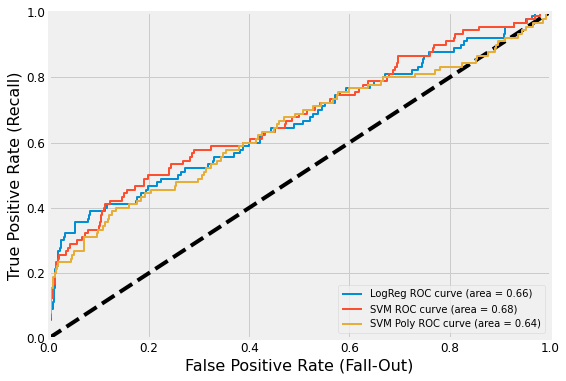

In [1591]:
plt.figure(figsize=(8, 6))                                    # Not shown
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)                                            # Not shown
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['LogReg','SVM','SVM Poly']
for idx,model in enumerate([model_svc_linear,model_svc,model_svc_poly]):
    y_scores = model.decision_function(X_val_trf)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

# **DECISION TREE**

In [1592]:
import pandas as pd
import numpy as np
data=pd.read_csv('bank-additional.csv', sep=";") 
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [1593]:
new_data = data.copy()

In [1594]:
encode = LabelEncoder()
new_data['job'] = encode.fit_transform(new_data['job'])
new_data['marital'] = encode.fit_transform(new_data['marital'])
new_data['education'] = encode.fit_transform(new_data['education'])
new_data['default'] = encode.fit_transform(new_data['default'])
new_data['housing'] = encode.fit_transform(new_data['housing'])
new_data['loan'] = encode.fit_transform(new_data['loan'])
new_data['contact'] = encode.fit_transform(new_data['contact'])
new_data['month'] = encode.fit_transform(new_data['month'])
new_data['day_of_week'] = encode.fit_transform(new_data['day_of_week'])
new_data['poutcome'] = encode.fit_transform(new_data['poutcome'])
new_data['y'] = encode.fit_transform(new_data['y'])

# **Split Data Train and Test**

In [1595]:
y_pred_train = tree_clf.predict(X_train)
y_pred = tree_clf.predict(X_test)

# **Model Train**

In [1596]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer 
print('MSE:', mean_squared_error(y_train,y_pred_train))
print('MAE:', mean_absolute_error(y_train,y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_train)))  # RMSE
print('r2:', r2_score(y_test,y_pred))

MSE: 0.09885535900104059
MAE: 0.09885535900104059
RMSE: 0.31441272080028915
r2: -0.09766878595216455


# **Model Test**

In [1597]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer 
print('MSE:', mean_squared_error(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))  # RMSE
print('r2:', r2_score(y_test,y_pred))

MSE: 0.10679611650485436
MAE: 0.10679611650485436
RMSE: 0.32679675106226863
r2: -0.09766878595216455


# **Model Scores**

In [1598]:
print('Training set score: {:.4f}'.format(tree_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree_clf.score(X_test, y_test)))

Training set score: 0.9011
Test set score: 0.8932


# **Model Tunning**

In [1599]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [1600]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

 
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 12978 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12993 out of 12996 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  1.1min finished


Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 90.11%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.911023    0.644860  0.901145     0.777941      0.881849
recall        0.985197    0.218354  0.901145     0.601776      0.901145
f1-score      0.946659    0.326241  0.901145     0.636450      0.878656
support    2567.000000  316.000000  0.901145  2883.000000   2883.000000
_______________________________________________
Confusion Matrix: 
 [[2529   38]
 [ 247   69]]

Test Result:
Accuracy Score: 89.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.910941   0.526316  0.893204    0.718629      0.868931
recall       0.975477   0.222222  0.893204    0.598850      0.89320

# **Tree Plotting**

In [1601]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

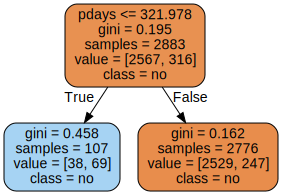

In [1602]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "y.dot"),
        feature_names=X_train.columns, # kolom dari fitur  
        class_names=data.y,  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "y.dot"))

# **RANDOM FOREST**

In [1603]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.998444    1.000000  0.998613     0.999222      0.998615
recall        1.000000    0.987342  0.998613     0.993671      0.998613
f1-score      0.999221    0.993631  0.998613     0.996426      0.998609
support    2567.000000  316.000000  0.998613  2883.000000   2883.000000
_______________________________________________
Confusion Matrix: 
 [[2567    0]
 [   4  312]]

Test Result:
Accuracy Score: 89.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.910941   0.526316  0.893204    0.718629      0.868931
recall       0.975477   0.222222  0.893204    0.598850      0.893204
f1-score     0.942105   0.312500  0.893204    0.627303      0.873338
support    367.000000  45.000000  0.893204  412.00000

# **Model Tunning**

In [1604]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.8min finished


Best paramters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 99.93%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.999221    1.000000  0.999306     0.999611      0.999307
recall        1.000000    0.993671  0.999306     0.996835      0.999306
f1-score      0.999611    0.996825  0.999306     0.998218      0.999305
support    2567.000000  316.000000  0.999306  2883.000000   2883.000000
_______________________________________________
Confusion Matrix: 
 [[2567    0]
 [   2  314]]

Test Result:
Accuracy Score: 89.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.907035   0.571429  0.895631    0.739232      0.870379
recall       0.983651   0.177778  0.895631   

In [1605]:
n_estimators = [100, 300]
max_features = ['auto', 'sqrt']
max_depth = [3, 5]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.5min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Train Result:
Accuracy Score: 99.48%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.994191    1.000000  0.994797     0.997095      0.994827
recall        1.000000    0.952532  0.994797     0.976266      0.994797
f1-score      0.997087    0.975689  0.994797     0.986388      0.994741
support    2567.000000  316.000000  0.994797  2883.000000   2883.000000
_______________________________________________
Confusion Matrix: 
 [[2567    0]
 [  15  301]]

Test Result:
Accuracy Score: 89.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.908629   0.500000  0.890777    0.704315      0.863998
recall       0.975477   0.200000  0.890777

# **K-NEAREST NEIGHBOUR**

# **Import Library**

In [1606]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt

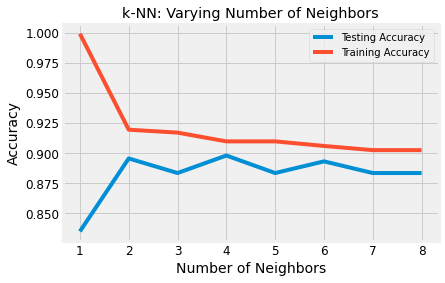

In [1607]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1608]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9025
Test set score: 0.8835


In [1609]:
metrics.accuracy_score(y_test,y_pred)

0.8932038834951457

In [1610]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       367
           1       0.53      0.22      0.31        45

    accuracy                           0.89       412
   macro avg       0.72      0.60      0.63       412
weighted avg       0.87      0.89      0.87       412



# **Additional Model (NAIVE BAYES)**

# **Import Library**

In [1611]:
#train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# **Model Train**

In [1612]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 1, 0])

In [1613]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8505


# **Model Test**

In [1614]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1615]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8398


# **Model Train and Model Test Score**

In [1616]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8505
Test set score: 0.8398


In [1617]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       367
           1       0.28      0.29      0.28        45

    accuracy                           0.84       412
   macro avg       0.59      0.60      0.60       412
weighted avg       0.84      0.84      0.84       412



# **Model Tunning**

In [1618]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [1619]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2338  229]
 [ 202  114]]
ACCURACY SCORE:
0.8505
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.920472    0.332362  0.850503     0.626417      0.856011
recall        0.910791    0.360759  0.850503     0.635775      0.850503
f1-score      0.915606    0.345979  0.850503     0.630792      0.853170
support    2567.000000  316.000000  0.850503  2883.000000   2883.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[333  34]
 [ 32  13]]
ACCURACY SCORE:
0.8398
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.912329   0.276596  0.839806    0.594462      0.842892
recall       0.907357   0.288889  0.839806    0.598123      0.839806
f1-score     0.909836   0.282609  0.839806    0.596222      0.841328
support    367.000000  45.000000  0.839806  412.000000    412.000000


# **Cross Validation**

In [1620]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86851211 0.8650519  0.84083045 0.86111111 0.85069444 0.86805556
 0.83333333 0.79861111 0.85416667 0.86805556]


In [1621]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8508


In [1622]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [1623]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 926 tasks      | elapsed:    3.7s


GaussianNB(priors=None, var_smoothing=0.0002310129700083158)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.0s finished


In [1624]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb_t = GaussianNB(priors=None, var_smoothing=0.0657933224657568)

# fit the model
gnb_t.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.0657933224657568)

In [1625]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb_t.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb_t.score(X_test, y_test)))

Training set score: 0.9011
Test set score: 0.8932


# **Model Analysis**

Dari hasil Training dan Testing masing-masing model didapatkan bahwa 

*   Akurasi Model Logistic Regression Sebesar 0,9013
*   Akurasi Model SVM model_svc Sebesar 90.17, model_svc_linear Sebesar 90.05, dan model_svc_poly Sebesar 89.93

*   Akurasi Model Decision Tree pada Training set sebesar 0.9011 dan pada Testing set sebesar 0.8932 dan dilakukan model tunning pada decision tree dengan hasil akurasi yang sama denhgan model biasa
*   Akurasi Model Random Forest pada Training set sebesar 99.76% dan pada Testing set sebesar 89.32% kemudian dilakukan model tunning pada random forest yang menghasilkan akurasi lebih baik yaitu pada Training set sebesar 99.93% dan Testing set sebesar 89.81%

*   Akurasi model KNN pada training set sebesar 0.9025 dan testing set sebesar 0.8835
*   Pada additional model naive bayes akurasi yang dihasilkan pada training set sebesar 0.8505 dan testing set sebesar 0.8398 kemudian pada model naive bayes dilakukan model tunning yang menghasilkan akurasi score yang lebih baik dengan training set 0.9011 dan testing set 0.8932






# **Overall Analysis**

Dari semua model yang digunakan dapat disimpulkan bahwa 


*   Pemilihan feature dilihat dari masing-masing value pada kolom feature yang pola grafik targetnya mengikuti pola value feature nya

*  model random forest menghasilkan akurasi terbaik dibandingkan dengan model-model lain
*  model tunning dapat memberikan hasil akurasi yang lebih baik karena menggunakan beberapa parameter untuk melakukan training dan testing sehingga dapat menghasilkan model yang lebih baik

*   hasil yang baik dari semua model dapat disebabkan karena data yang imbalance karena jumlah value dari target berbeda jauh dengan komposisi target yes sebanyak 451 dan target no sebanyak 3668
*   penggunaan data bank-additional dilakukan karena untuk pertimbangan waktu train dan test yang dapat dihabiskan, dengan menggunakan data bank-additional ditujukan untuk mempersingkat waktu pada saat melakukan model train dan model test




